In [24]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
model = keras.Sequential([
#    keras.layers.InputLayer(input_shape = (1,)),
    keras.layers.Dense(units = 8, input_shape = (1,), name = 'my_dense_input'), # 이걸로 위의 layer 생략가능하다. 맨 처음 hidden layer에만 적용 가능하다.
    keras.layers.Dense(units = 4, name = 'my_dense_output')
], name = 'my_model1')
#model.summary()
#model.layers[0].name
#model.get_layer(index=0).name
#model.get_layer(name = 'my_dense_input').name

2023-06-12 20:00:27.042641: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-12 20:00:27.043842: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
# 모델에 layer 추가 맨 마지막만 추가 가능
model.add(keras.layers.Dense(units = 1, name = 'my_dense_final_output'))

In [5]:
model.summary()

Model: "my_model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_dense_input (Dense)      (None, 8)                 16        
                                                                 
 my_dense_output (Dense)     (None, 4)                 36        
                                                                 
 my_dense_final_output (Dens  (None, 1)                5         
 e)                                                              
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 모델에 layer 삭제, 맨 마지막에 삭제
model.pop()
model.summary()

Model: "my_model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_dense_input (Dense)      (None, 8)                 16        
                                                                 
 my_dense_output (Dense)     (None, 4)                 36        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [7]:
model2 = keras.Sequential()
layer1 = keras.layers.Dense(10, input_shape = (1,))
layer2 = keras.layers.Dense(5)

model2.add(layer1)
model2.add(layer2)
model2.summary()


#Sequential() 모델은 1자형으로 모델이다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [8]:
!pip install pydot graphviz

Defaulting to user installation because normal site-packages is not writeable


In [9]:
keras.utils.plot_model(model2)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
#### funtional model
# 각각의 모델들의 핸들을 다 만드는 것과 비슷하다.
input_layer = keras.layers.Input(shape=(1,))
hidden_layer1 = keras.layers.Dense(1, name = 'hidden1')
hidden_layer2 = keras.layers.Dense(1, name = 'hidden2')
output_layer = keras.layers.Dense(1, name = 'output')

 # colab1

           model2 = keras.Sequential()
           layer1 = keras.layers.Dense(10, input_shape = (1,), name = 'layer1')
           layer2 = keras.layers.Dense(5, name='layer2')
           
           model2.add(layer1)
           model2.add(layer2)
           model2.summary()
           keras.utils.plot_model(model2)
           out1 = model2.predict(X)
           print(out1, np.array(out1).shape)

# colab2
        input_layer = keras.layers.Input(shape=(1,))
        hidden_layer1 = keras.layers.Dense(1, name = 'hidden1')(input_layer) # 형태 출력값 = 함수 (입력값)
        hidden_layer2 = keras.layers.Dense(1, name = 'hidden2')(input_layer)
        output_layer = keras.layers.Dense(1, name = 'output')(hidden_layer2)
        
        #step1 = hidden_layer1(input_layer)
        #step2 = hidden_layer2(step1)
        #step3 = output_layer(step2)
        
        
        #step1 = hidden_layer1(input_layer)
        #step2 = hidden_layer2(input_layer)
        #step3 = output_layer(step2)
        
        #model = keras.Model(inputs=[input_layer], outputs=[step1, step3])
        model = keras.Model(inputs=[input_layer], outputs=[hidden_layer1, output_layer])
        out2 = model.predict(X)
        print(out2, np.array(out2).shape)
        keras.utils.plot_model(model)

#### weight 값 초기값 설정 
Layer weight initializers

RandomNormal class : 정규화 커브를 따라 랜덤하게 초기값 잡는다.

RandomUniform class : 일정하게 랜덤하게 초기값을 잡는다.

In [22]:
#### Layer
model = keras.Sequential([
    keras.layers.Dense(units = 1, input_shape=(1,), name = 'my_dense_input', kernel_initializer = keras.initializers.Ones())
], name = 'my_model1')
layer1 = model.get_layer(index=0)
layer1.weights
# weights 보기
layer1.get_weights()
# weights 덮어쓰기
layer1.set_weights([np.array([[0.12345]]), np.array([0.54321])])
layer1.get_weights()


layer1.trainable = False
layer1.trainable_weights # 나중에 machine learning을 돌릴때, training이 가능한 데이터를 trainable_weights라고 표기가 된다.
model.summary()

Model: "my_model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_dense_input (Dense)      (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 0
Non-trainable params: 2
_________________________________________________________________


In [ ]:
# 학습하는 과정이 없는 layer 들이 있다. 그 중 하나가 Activation layer이다.
# activation relu를 적용시키는 방법
# 방법 1
model = keras.Sequential([
    keras.layers.Dense(input_shape=(1,), activation = 'relu')
], name = 'my_model1')

# 방법 2 ==옵션(매개변수)를 사용할 때 이렇게 사용
model = keras.Sequential([
    keras.layers.Dense(input_shape=(1,), activation = keras.activations.relu())
], name = 'my_model1')


# 방법 3
model = keras.Sequential([
    keras.layers.Dense(input_shape=(1,)),
    keras.layers.ReLU()
], name = 'my_model1')

# 방법 4
model = keras.Sequential([
    keras.layers.Dense(input_shape=(1,)),
    keras.layers.Activation('relu')
], name = 'my_model1')

# 방법 5 == 옵션(매개변수)를 사용할 때 이렇게 사용
model = keras.Sequential([
    keras.layers.Dense(input_shape=(1,)),
    keras.layers.Activation(keras.activations.relu())
], name = 'my_model1')

4/4 [==============================] - 0s 2ms/step


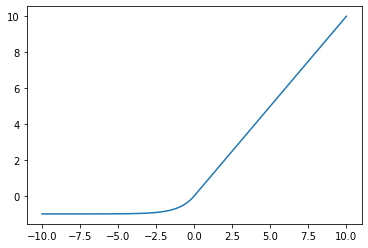

In [35]:
X = np.linspace(-10, 10, 100).reshape(100, 1)
model = keras.Sequential([
    #keras.layers.Activation(keras.activations.sigmoid)
    #keras.layers.activation('sigmoid')
    #keras.layers.Activation('relu')
    #keras.layers.ReLU(negative_slope = 0.2) # leakyrelu이다.
    keras.layers.ELU()
])
_, axe = plt.subplots()
axe.plot(X, model.predict(X))


# sigmoid를 사용하는 이유 x값에 따라 얼마나 크게 할 것인가. 아니면 안줄 것인가.
# 요즘은 사용하지 않는다. '폭주' 때문이다.
# 뉴런 네트워크 안에서 계속 신호를 보내게 걸리거나, 계속 신호를 안보내게 걸리거나 한다.
# 그래서 relu를 쓰는 것이 아직까지는 좋다. threthold아래에 걸려버리면 신호가 아예 나오지 않는 것이 있다.
# 그래도 요즘은 relu를 쓰는데 이것도 애매해서 요즘은 leakyrelu를 쓴다. 이것은 relu에 alpha값을 바꾸면 만들 수 있다.

In [36]:
# Convolution, Pooling layer는 CNN에 사용되는 layer 이다.
# Recurrent layers는 RNN에 사용되는 layer 이다. (시계열 데이터 : 앞선 단계에 있는 값들이 그 이후에 값에 영향을 미친다.)
# Preprocessing, Normalization layer 안에서 machine learning 까지 다 끝내는 것. training layer가 없다.
# Regularization layer 과적합을 막는 layer (most use : dropout layer)
# Attention layers transformer를 만드는 layer
# Reshaping layers 말 그대로 reshape하는 layer
# Merging layers 